In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt

from ei_net import * 
from ce_net import * 
from utilities import show_values

import cmocean as cmo

%matplotlib inline

In [2]:
##########################################
############ PLOTTING SETUP ##############
EI_cmap = "Greys"
where_to_save_pngs = "../figs/pngs/"
where_to_save_pdfs = "../figs/pdfs/"
save = True
plt.rc('axes', axisbelow=True)
plt.rc('axes', linewidth=2)
##########################################
##########################################

# Chapter 04: Effective Information in Real Networks

$EI$ often grows with network size. To compare networks of different sizes, we examine their *effectiveness*, which is the $EI$ normalized by the size of the network to a value between $0.0$ and $1.0$:

$$ \text{effectiveness} = \frac{EI}{\log_2(N)} $$

As the noise and/or the degeneracy of a network increases toward their upper possible bounds, the effectiveness of that network will trend to $0.0$. Regardless of its size, a network wherein each node has a deterministic output to a unique target has an effectiveness of $1.0$. 

Here, we examine the effectiveness of 84 different networks corresponding to data from real systems. These networks were selected primarily from the [Konect Network Database](http://konect.cc/), which was used because its networks are publicly available, range in size from dozens to tens of thousands of nodes, often have a reasonable interpretation as a causal structure, and they are diverse, ranging from social networks, to power networks, to metabolic networks. We defined four categories of interest: biological, social, informational, and technological. We selected our networks by using all the available networks (under 40,000 nodes) in the domains corresponding to each category within the Konect database, and where it was appropriate, the [Network Repository](http://networkrepository.com/) as well. 

Lower effectiveness values correspond to structures that either have high degeneracy, low determinism, or a combination of both. In the networks we measured, biological networks on average have lower effectiveness values, whereas technological networks on average have the highest effectiveness. This finding aligns intuitively with what we know about the relationship between $EI$ and network structure, and it also supports long-standing hypotheses about the role of redundancy, degeneracy, and noise in biological systems. On the other hand, technological networks such as power grids, autonomous systems, or airline networks are associated with higher effectiveness values on average. One explanation for this difference is that efficiency in human-made technological networks tends to create sparser, non-degenerate networks with higher effectiveness on average.

Perhaps it might be surprising to find that evolved networks have such low effectiveness. But, as we will show, a low effectiveness can actually indicate that there are informative higher-scale (macroscale) dependencies in the system. That is, a low effectiveness can be reflective of the fact that biological systems often contain higher-scale causal structure, which we demonstrate in the following section.


________________________

# Network Data

# Citations

In [4]:
newcos = ["#ed4f44","#fdcb12","#7f61c3","#00c6c5","#333333"]

In [5]:
citation_dict = {'Name':["HEP-ph citations","HEP-th citations",
                         "Cora citations", "DBLP citations"], 
                 "Network":[], 
                 "Source":["Konect"]*4,
                 "Category":["Citation"]*4,
                 "Category_EI":["Information"]*4,
                 "newco":[newcos[1]]*4,
                 "Filename":["../data/konect_data/citations/cit-HepPh/out.cit-HepPh", 
                             "../data/konect_data/citations/cit-HepTh/out.cit-HepTh",
                             "../data/konect_data/citations/subelj_cora/out.subelj_cora_cora",
                             "../data/konect_data/citations/dblp-cite/out.dblp-cite"]}

for fn in citation_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        citation_dict['Network'].append(g)
        
print()
for net in range(len(citation_dict['Network'])):
    print(citation_dict['Name'][net], "has \t",
          citation_dict['Network'][net].number_of_nodes(), "nodes and",
          citation_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/citations/cit-HepPh/out.cit-HepPh
../data/konect_data/citations/cit-HepTh/out.cit-HepTh
../data/konect_data/citations/subelj_cora/out.subelj_cora_cora
../data/konect_data/citations/dblp-cite/out.dblp-cite

HEP-ph citations has 	 34546 nodes and 421578 edges.
HEP-th citations has 	 27770 nodes and 352807 edges.
Cora citations has 	 23166 nodes and 91500 edges.
DBLP citations has 	 12591 nodes and 49743 edges.


# Coauthorships

In [6]:
coauthor_dict = {'Name':["Astro-ph coauthorships", "HEP-ph coauthorships",
                         "HEP-th coauthorships"],
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Coauthorship"]*3,
                 "Category_EI":["Information"]*3,
                 "newco":[newcos[1]]*3,
                 "Filename":["../data/konect_data/coauthorship/ca-AstroPh/out.ca-AstroPh", 
                             "../data/konect_data/coauthorship/ca-cit-HepPh/out.ca-cit-HepPh", 
                             "../data/konect_data/coauthorship/ca-cit-HepTh/out.ca-cit-HepTh"]}

for fn in coauthor_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('paperID', float)])
        coauthor_dict['Network'].append(g)
        
print()
for net in range(len(coauthor_dict['Network'])):
    print(coauthor_dict['Name'][net], "has \t",
          coauthor_dict['Network'][net].number_of_nodes(), "nodes and",
          coauthor_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/coauthorship/ca-AstroPh/out.ca-AstroPh
../data/konect_data/coauthorship/ca-cit-HepPh/out.ca-cit-HepPh
../data/konect_data/coauthorship/ca-cit-HepTh/out.ca-cit-HepTh

Astro-ph coauthorships has 	 18771 nodes and 198050 edges.
HEP-ph coauthorships has 	 28093 nodes and 3148446 edges.
HEP-th coauthorships has 	 22908 nodes and 2444797 edges.


# Communication

In [7]:
communic_dict = {'Name':["Tarragona univ. emails", "Dem. Nat. Comm. emails", "Digg user-user replies", 
                         "UC Irvine messages", "Manufacturing emails"],
                 "Network":[], 
                 "Source":["Konect"]*5,
                 "Category":["Communication"]*5,
                 "Category_EI":["Social"]*5,
                 "newco":[newcos[1]]*5,
                 "Filename":["../data/konect_data/communication/arenas-email/out.arenas-email", 
                             "../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph", 
                             "../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply", 
                             "../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial", 
                             "../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email"]}

for fn in communic_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('timestamp', float)])
        communic_dict['Network'].append(g)
        
print()
for net in range(len(communic_dict['Network'])):
    print(communic_dict['Name'][net], "has  \t",
          communic_dict['Network'][net].number_of_nodes(), "nodes and",
          communic_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/communication/arenas-email/out.arenas-email
../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph
../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply
../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial
../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email

Tarragona univ. emails has  	 1133 nodes and 5451 edges.
Dem. Nat. Comm. emails has  	 1891 nodes and 5598 edges.
Digg user-user replies has  	 30398 nodes and 86403 edges.
UC Irvine messages has  	 1899 nodes and 20295 edges.
Manufacturing emails has  	 167 nodes and 5784 edges.


# Computer

In [8]:
computer_dict = {'Name':["CAIDA autonomous systems", "Route views autonomous systems", 
                         "Internet autonomous systems"], 
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Computer"]*3,
                 "Category_EI":["Technological"]*3,
                 "newco":[newcos[3]]*3,
                 "Filename":["../data/konect_data/computer/as-caida20071105/out.as-caida20071105", 
                             "../data/konect_data/computer/as20000102/out.as20000102", 
                             "../data/konect_data/computer/topology/out.topology"]}

for fn in computer_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('timestamp', float)])
        computer_dict['Network'].append(g)
        
print()
for net in range(len(computer_dict['Network'])):
    print(computer_dict['Name'][net], "has    \t",
          computer_dict['Network'][net].number_of_nodes(), "nodes and",
          computer_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/computer/as-caida20071105/out.as-caida20071105
../data/konect_data/computer/as20000102/out.as20000102
../data/konect_data/computer/topology/out.topology

CAIDA autonomous systems has    	 26475 nodes and 53381 edges.
Route views autonomous systems has    	 6474 nodes and 13895 edges.
Internet autonomous systems has    	 34761 nodes and 114495 edges.


# Human Contact

In [9]:
humancon_dict = {'Name':["Haggle RFID contact", "Reality mining RFID", 
                         "California windsurfers", "Train terrorists",
                         "Hypertext conference", "Infectious conference"], 
                 "Network":[], 
                 "Source":["Konect"]*6, 
                 "Category":["Human Contact"]*6,
                 "Category_EI":["Social"]*6,
                 "newco":[newcos[2]]*6,
                 "Filename":["../data/konect_data/humancontact/contact/out.contact", 
                     "../data/konect_data/humancontact/mit/out.mit", 
                     "../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach", 
                     "../data/konect_data/humancontact/moreno_train/out.moreno_train_train", 
                     "../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext",
                     "../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious"]}

for fn in humancon_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        humancon_dict['Network'].append(g)
        
print()
for net in range(len(humancon_dict['Network'])):
    print(humancon_dict['Name'][net], "has    \t",
          humancon_dict['Network'][net].number_of_nodes(), "nodes and",
          humancon_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humancontact/contact/out.contact
../data/konect_data/humancontact/mit/out.mit
../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach
../data/konect_data/humancontact/moreno_train/out.moreno_train_train
../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext
../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious

Haggle RFID contact has    	 274 nodes and 2899 edges.
Reality mining RFID has    	 96 nodes and 2539 edges.
California windsurfers has    	 43 nodes and 335 edges.
Train terrorists has    	 64 nodes and 242 edges.
Hypertext conference has    	 113 nodes and 2195 edges.
Infectious conference has    	 410 nodes and 2764 edges.


# Human Social

In [10]:
humansoc_dict = {'Name':["Jazz musicians", "Adolescent health", "Physicians", 
                         "Resident hall", "Sampson cloister", 
                         "Seventh graders", "Taro gift-giving", 
                         "Dutch college", "Highland tribes", "Illinois school"], 
                 "Network":[], 
                 "Source":["Konect"]*10,
                 "Category":["Human Social"]*10,
                 "Category_EI":["Social"]*10,
                 "newco":[newcos[2]]*10,
                 "Filename":["../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz", 
                     "../data/konect_data/humansocial/moreno_health/out.moreno_health_health", 
                     "../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation", 
                     "../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz", 
                     "../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson", 
                     "../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh", 
                     "../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro", 
                     "../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb", 
                     "../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama",
                     "../data/konect_data/humansocial/moreno_highschool/out.moreno_highschool_highschool"]}

for fn in humansoc_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        if fn=="../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson" or \
           fn=="../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb" or \
           fn=="../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama":
            el = np.loadtxt("../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson",
                            comments='%')
            g = nx.from_edgelist(list(zip(el[:,0],el[:,1])))
            
        else:
            
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
            except:
                try:
                    g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                          data=[('weight', float)])
                except:
                    g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                      data=[('weight', float), ('timestamp', float)])
        humansoc_dict['Network'].append(g)
        
print()
for net in range(len(humansoc_dict['Network'])):
    print(humansoc_dict['Name'][net], "has  \t",
          humansoc_dict['Network'][net].number_of_nodes(), "nodes and",
          humansoc_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz
../data/konect_data/humansocial/moreno_health/out.moreno_health_health
../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation
../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz
../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson
../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh
../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro
../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb
../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama
../data/konect_data/humansocial/moreno_highschool/out.moreno_highschool_highschool

Jazz musicians has  	 198 nodes and 2742 edges.
Adolescent health has  	 2539 nodes and 12968 edges.
Physicians has  	 241 nodes and 1098 edges.
Resident hall has  	 217 nodes and 2671 edges.
Sampson cloister has  	 18 nodes and 126 edges.
Seventh graders has  	 29 nodes and 375 edges.
Taro gift-giving ha

# Hyperlink

In [11]:
hyperlin_dict = {'Name':["Free online dict.", "Political blogs", "Google internal"],
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Hyperlink"]*3,
                 "Category_EI":["Information"]*3,
                 "newco":[newcos[1]]*3,                 
                 "Filename":["../data/konect_data/hyperlink/foldoc/out.foldoc", 
                             "../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs",
                             "../data/konect_data/hyperlink/cfinder-google/out.cfinder-google"]}

for fn in hyperlin_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        hyperlin_dict['Network'].append(g)
        
print()
for net in range(len(hyperlin_dict['Network'])):
    print(hyperlin_dict['Name'][net], "has \t",
          hyperlin_dict['Network'][net].number_of_nodes(), "nodes and",
          hyperlin_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/hyperlink/foldoc/out.foldoc
../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs
../data/konect_data/hyperlink/cfinder-google/out.cfinder-google

Free online dict. has 	 13356 nodes and 120237 edges.
Political blogs has 	 1224 nodes and 19025 edges.
Google internal has 	 15763 nodes and 171206 edges.


# Infrastructure

In [12]:
infrastr_dict = {'Name':["Air traffic control", "OpenFlights v1", "OpenFlights v2", 
                         "Contiguous U.S.", "European roads", "Chicago roads",
                         "West U.S. powergrid", "U.S. Airports"],
                 "Network":[], 
                 "Source":["Konect"]*8,
                 "Category":["Infrastructure"]*8,
                 "Category_EI":["Technological"]*8,
                 "newco":[newcos[3]]*8,                 
                 "Filename":["../data/konect_data/infrastructure/maayan-faa/out.maayan-faa", 
                             "../data/konect_data/infrastructure/openflights/out.openflights",
                             "../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights",
                             "../data/konect_data/infrastructure/contiguous-usa/out.contiguous-usa",
                             "../data/konect_data/infrastructure/subelj_euroroad/out.subelj_euroroad_euroroad",
                             "../data/konect_data/infrastructure/tntp-ChicagoRegional/out.tntp-ChicagoRegional",
                             "../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid",
                             "../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport"]}

for fn in infrastr_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        infrastr_dict['Network'].append(g)
        
print()
for net in range(len(infrastr_dict['Network'])):
    print(infrastr_dict['Name'][net], "has\t",
          infrastr_dict['Network'][net].number_of_nodes(), "nodes and",
          infrastr_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/infrastructure/maayan-faa/out.maayan-faa
../data/konect_data/infrastructure/openflights/out.openflights
../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights
../data/konect_data/infrastructure/contiguous-usa/out.contiguous-usa
../data/konect_data/infrastructure/subelj_euroroad/out.subelj_euroroad_euroroad
../data/konect_data/infrastructure/tntp-ChicagoRegional/out.tntp-ChicagoRegional
../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid
../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport

Air traffic control has	 1226 nodes and 2615 edges.
OpenFlights v1 has	 3425 nodes and 37595 edges.
OpenFlights v2 has	 2939 nodes and 30501 edges.
Contiguous U.S. has	 49 nodes and 107 edges.
European roads has	 1174 nodes and 1417 edges.
Chicago roads has	 1467 nodes and 1298 edges.
West U.S. powergrid has	 4941 nodes and 6594 edges.
U.S. Airports has	 1574 nodes and 28235 edges.


# Lexical

In [13]:
lexicals_dict = {'Name':["David Copperfield", "Edinburgh thesaurus",  
                         "King James Bible"],
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Lexical"]*3,
                 "Category_EI":["Information"]*3,
                 "newco":[newcos[1]]*3,
                 "Filename":["../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency", 
                             "../data/konect_data/lexical/eat/out.eat", 
                             "../data/konect_data/lexical/moreno_names/out.moreno_names_names"]} 

for fn in lexicals_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        lexicals_dict['Network'].append(g)
        
print()
for net in range(len(lexicals_dict['Network'])):
    print(lexicals_dict['Name'][net], "has    \t",
          lexicals_dict['Network'][net].number_of_nodes(), "nodes and",
          lexicals_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency
../data/konect_data/lexical/eat/out.eat
../data/konect_data/lexical/moreno_names/out.moreno_names_names

David Copperfield has    	 112 nodes and 425 edges.
Edinburgh thesaurus has    	 23132 nodes and 312309 edges.
King James Bible has    	 1773 nodes and 9130 edges.


# Metabolic

In [14]:
metaboli_dict = {'Name':["C. elegans metabolic", "Human protein (Figeys)", "PDZbase protein", 
                         "Human protein (Stelzl)", "Human protein (Vidal)", 
                         "Yeast protein  ", "Reactome humans"], 
                 "Network":[], 
                 "Source":["Konect"]*7,
                 "Category":["Metabolic"]*7,
                 "Category_EI":["Biological"]*7,
                 "newco":[newcos[0]]*7,
                 "Filename":["../data/konect_data/metabolic/arenas-meta/out.arenas-meta", 
                             "../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys",
                             "../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase",
                             "../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl",
                             "../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal",
                             "../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro",
                             "../data/konect_data/metabolic/reactome/out.reactome"]}

for fn in metaboli_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        metaboli_dict['Network'].append(g)
        
print()
for net in range(len(metaboli_dict['Network'])):
    print(metaboli_dict['Name'][net], "has     \t",
          metaboli_dict['Network'][net].number_of_nodes(), "nodes and",
          metaboli_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/metabolic/arenas-meta/out.arenas-meta
../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys
../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase
../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl
../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal
../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro
../data/konect_data/metabolic/reactome/out.reactome

C. elegans metabolic has     	 453 nodes and 2040 edges.
Human protein (Figeys) has     	 2239 nodes and 6452 edges.
PDZbase protein has     	 212 nodes and 244 edges.
Human protein (Stelzl) has     	 1706 nodes and 6207 edges.
Human protein (Vidal) has     	 3133 nodes and 6726 edges.
Yeast protein   has     	 1870 nodes and 2277 edges.
Reactome humans has     	 6327 nodes and 147547 edges.


# Online Social Network

In [15]:
socialne_dict = {'Name':["Avogato", "Google+", "Hamsterster", "Twitter lists", "Facebook NIPS"],
                 "Network":[], 
                 "Source":["Konect"]*5,
                 "Category":["Social"]*5,
                 "Category_EI":["Social"]*5,
                 "newco":[newcos[2]]*5,
                 "Filename":["../data/konect_data/social/advogato/out.advogato", 
                             "../data/konect_data/social/ego-gplus/out.ego-gplus", 
                             "../data/konect_data/social/petster-hamster/out.petster-hamster", 
                             "../data/konect_data/social/ego-twitter/out.ego-twitter",
                             "../data/konect_data/social/ego-facebook/out.ego-facebook"]}
# note, filmtipset is unavailable
for fn in socialne_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        socialne_dict['Network'].append(g)
        
print()
for net in range(len(socialne_dict['Network'])):
    print(socialne_dict['Name'][net], "has     \t",
          socialne_dict['Network'][net].number_of_nodes(), "nodes and",
          socialne_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/social/advogato/out.advogato
../data/konect_data/social/ego-gplus/out.ego-gplus
../data/konect_data/social/petster-hamster/out.petster-hamster
../data/konect_data/social/ego-twitter/out.ego-twitter
../data/konect_data/social/ego-facebook/out.ego-facebook

Avogato has     	 6539 nodes and 51126 edges.
Google+ has     	 23628 nodes and 39242 edges.
Hamsterster has     	 2426 nodes and 16631 edges.
Twitter lists has     	 23370 nodes and 33101 edges.
Facebook NIPS has     	 2888 nodes and 2981 edges.


# Software Dependencies

In [16]:
software_dict = {'Name':["Linux dependency", "J.D.K. dependency", "JUNG/javax dependency"],
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Software"]*3,
                 "Category_EI":["Information"]*3,
                 "newco":[newcos[1]]*3,
                 "Filename":["../data/konect_data/software/linux/out.linux", 
                             "../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk", 
                             "../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j"]}

for fn in software_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        software_dict['Network'].append(g)
        
print()
for net in range(len(software_dict['Network'])):
    print(software_dict['Name'][net], "has    \t",
          software_dict['Network'][net].number_of_nodes(), "nodes and",
          software_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/software/linux/out.linux
../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk
../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j

Linux dependency has    	 30837 nodes and 213954 edges.
J.D.K. dependency has    	 6434 nodes and 53892 edges.
JUNG/javax dependency has    	 6120 nodes and 50535 edges.


# Trophic

In [17]:
trophicl_dict = {'Name':["Florida ecosystem - dry", "Florida ecosystem - wet", "Little Rock Lake ecosystem"],
                 "Network":[], 
                 "Source":["Konect"]*3,
                 "Category":["Trophic"]*3,
                 "Category_EI":["Biological"]*3,
                 "newco":[newcos[0]]*3,
                 "Filename":["../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry", 
                             "../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet", 
                             "../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb"]}

for fn in trophicl_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        trophicl_dict['Network'].append(g)
        
print()
for net in range(len(trophicl_dict['Network'])):
    print(trophicl_dict['Name'][net], "has \t",
          trophicl_dict['Network'][net].number_of_nodes(), "nodes and",
          trophicl_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry
../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet
../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb

Florida ecosystem - dry has 	 128 nodes and 2136 edges.
Florida ecosystem - wet has 	 128 nodes and 2105 edges.
Little Rock Lake ecosystem has 	 183 nodes and 2494 edges.


In [18]:
konect_dict = {"citations":      citation_dict, 
               "coauthorship":   coauthor_dict, 
               "communication":  communic_dict, 
               "computer":       computer_dict, 
               "humancontact":   humancon_dict, 
               "humansocial":    humansoc_dict, 
               "hyperlink":      hyperlin_dict, 
               "infrastructure": infrastr_dict, 
               "lexical":        lexicals_dict, 
               "metabolic":      metaboli_dict, 
               "social":         socialne_dict, 
               "software":       software_dict, 
               "trophic":        trophicl_dict}

print("A total of %i networks."%sum([len(val['Network']) for val in konect_dict.values()]))

A total of 63 networks.


# Supplemental Data: Network Repository

In [19]:
brain_fn = '../data/networkrepository_data/brains/'
netrepo_brains = {'Name':["Cat brain 1","Drosophila medulla","Rhesus brain 1","Rhesus brain 2",
                          "Macaque cerebral","Macaque interareal","Mouse Kasthuri","Mouse brain 1",
                          "Mouse retina 1","Mouse visual 1","Mouse visual 2"],
"Network":[], 
"Source":["NetworkRepository"]*11,
"Category":["Brain"]*11,
"Category_EI":["Biological"]*11,
"newco":[newcos[0]]*11,
"Filename":[
brain_fn+'bn-cat-mixed-species_brain_1/bn-cat-mixed-species_brain_1.edges',
brain_fn+'bn-fly-drosophila_medulla_1/bn-fly-drosophila_medulla_1.edges',
brain_fn+'bn-macaque-rhesus_brain_1/bn-macaque-rhesus_brain_1.edges',
brain_fn+'bn-macaque-rhesus_brain_2/bn-macaque-rhesus_brain_2.edges',
brain_fn+'bn-macaque-rhesus_cerebral-cortex_1/bn-macaque-rhesus_cerebral-cortex_1.edges',
brain_fn+'bn-macaque-rhesus_interareal-cortical-network_2/bn-macaque-rhesus_interareal-cortical-network_2.edges',
brain_fn+'bn-mouse-kasthuri_graph_v4/bn-mouse-kasthuri_graph_v4.edges',
brain_fn+'bn-mouse_brain_1/bn-mouse_brain_1.edges',
brain_fn+'bn-mouse_retina_1/bn-mouse_retina_1.edges',
brain_fn+'bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.edges',
brain_fn+'bn-mouse_visual-cortex_2/bn-mouse_visual-cortex_2.edges']}

for fn in netrepo_brains['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        g = nx.parse_edgelist(f, create_using=nx.DiGraph())
        netrepo_brains['Network'].append(g)

        
print()
for net in range(len(netrepo_brains['Network'])):
    print(netrepo_brains['Name'][net], "has         \t",
          netrepo_brains['Network'][net].number_of_nodes(), "nodes and",
          netrepo_brains['Network'][net].number_of_edges(), "edges.")

../data/networkrepository_data/brains/bn-cat-mixed-species_brain_1/bn-cat-mixed-species_brain_1.edges
../data/networkrepository_data/brains/bn-fly-drosophila_medulla_1/bn-fly-drosophila_medulla_1.edges
../data/networkrepository_data/brains/bn-macaque-rhesus_brain_1/bn-macaque-rhesus_brain_1.edges
../data/networkrepository_data/brains/bn-macaque-rhesus_brain_2/bn-macaque-rhesus_brain_2.edges
../data/networkrepository_data/brains/bn-macaque-rhesus_cerebral-cortex_1/bn-macaque-rhesus_cerebral-cortex_1.edges
../data/networkrepository_data/brains/bn-macaque-rhesus_interareal-cortical-network_2/bn-macaque-rhesus_interareal-cortical-network_2.edges
../data/networkrepository_data/brains/bn-mouse-kasthuri_graph_v4/bn-mouse-kasthuri_graph_v4.edges
../data/networkrepository_data/brains/bn-mouse_brain_1/bn-mouse_brain_1.edges
../data/networkrepository_data/brains/bn-mouse_retina_1/bn-mouse_retina_1.edges
../data/networkrepository_data/brains/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.edges


In [20]:
netrepo_power = {'Name':["Power 1138BUS","Power 494BUS","Power 662BUS","Power 685BUS",
                         "U.S. power grid","Power pcspwr 09","Power pcspwr 10","Power ERIS1176"],
"Network":[], 
"Source":["NetworkRepository"]*8,
"Category":["Powergrid"]*8,
"Category_EI":["Technological"]*8,
"newco":[newcos[3]]*8,
"Filename":['../data/networkrepository_data/powergrids/power-1138-bus/power-1138-bus.txt',
            '../data/networkrepository_data/powergrids/power-494-bus/power-494-bus.txt',
            '../data/networkrepository_data/powergrids/power-662-bus/power-662-bus.txt',
            '../data/networkrepository_data/powergrids/power-685-bus/power-685-bus.txt',
            '../data/networkrepository_data/powergrids/power-US-Grid/power-US-Grid.txt',
            '../data/networkrepository_data/powergrids/power-bcspwr09/power-bcspwr09.txt',
            '../data/networkrepository_data/powergrids/power-bcspwr10/power-bcspwr10.txt',
            '../data/networkrepository_data/powergrids/power-eris1176/power-eris1176.txt']}

for fn in netrepo_power['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        el = np.loadtxt(fn)
        g = nx.from_edgelist(list(zip(el[:,0],el[:,1])), create_using=nx.DiGraph)
        netrepo_power['Network'].append(g)
        
print()
for net in range(len(netrepo_power['Network'])):
    print(netrepo_power['Name'][net], "has  \t",
          netrepo_power['Network'][net].number_of_nodes(), "nodes and",
          netrepo_power['Network'][net].number_of_edges(), "edges.")

../data/networkrepository_data/powergrids/power-1138-bus/power-1138-bus.txt
../data/networkrepository_data/powergrids/power-494-bus/power-494-bus.txt
../data/networkrepository_data/powergrids/power-662-bus/power-662-bus.txt
../data/networkrepository_data/powergrids/power-685-bus/power-685-bus.txt
../data/networkrepository_data/powergrids/power-US-Grid/power-US-Grid.txt
../data/networkrepository_data/powergrids/power-bcspwr09/power-bcspwr09.txt
../data/networkrepository_data/powergrids/power-bcspwr10/power-bcspwr10.txt
../data/networkrepository_data/powergrids/power-eris1176/power-eris1176.txt

Power 1138BUS has  	 1138 nodes and 2596 edges.
Power 494BUS has  	 494 nodes and 1080 edges.
Power 662BUS has  	 662 nodes and 1568 edges.
Power 685BUS has  	 685 nodes and 1967 edges.
U.S. power grid has  	 4941 nodes and 6594 edges.
Power pcspwr 09 has  	 1723 nodes and 4117 edges.
Power pcspwr 10 has  	 5300 nodes and 13571 edges.
Power ERIS1176 has  	 1176 nodes and 9864 edges.


In [21]:
netrepo_tech = {'Name':["WHOIS protocol","PGP protocol","Routers RF"],
"Network":[], 
"Source":["NetworkRepository"]*3,
"Category":["Technological"]*3,
"Category_EI":["Technological"]*3,
"newco":[newcos[3]]*3,
"Filename":['../data/networkrepository_data/technological/tech-WHOIS/tech-WHOIS.txt',
            '../data/networkrepository_data/technological/tech-pgp/tech-pgp.txt',
            '../data/networkrepository_data/technological/tech-routers-rf/tech-routers-rf.txt']}

for fn in netrepo_tech['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        el = np.loadtxt(fn)
        g = nx.from_edgelist(list(zip(el[:,0],el[:,1])), create_using=nx.DiGraph)
        netrepo_tech['Network'].append(g)
        
print()
for net in range(len(netrepo_tech['Network'])):
    print(netrepo_tech['Name'][net], "has  \t",
          netrepo_tech['Network'][net].number_of_nodes(), "nodes and",
          netrepo_tech['Network'][net].number_of_edges(), "edges.")

../data/networkrepository_data/technological/tech-WHOIS/tech-WHOIS.txt
../data/networkrepository_data/technological/tech-pgp/tech-pgp.txt
../data/networkrepository_data/technological/tech-routers-rf/tech-routers-rf.txt

WHOIS protocol has  	 7476 nodes and 56943 edges.
PGP protocol has  	 10680 nodes and 24316 edges.
Routers RF has  	 2113 nodes and 6632 edges.


In [22]:
network_data = {"citations":      citation_dict, 
                "coauthorship":   coauthor_dict, 
                "communication":  communic_dict, 
                "computer":       computer_dict, 
                "humancontact":   humancon_dict, 
                "humansocial":    humansoc_dict, 
                "hyperlink":      hyperlin_dict, 
                "infrastructure": infrastr_dict, 
                "lexical":        lexicals_dict, 
                "metabolic":      metaboli_dict, 
                "social":         socialne_dict, 
                "software":       software_dict, 
                "trophic":        trophicl_dict,
                "technological":  netrepo_tech,
                "brains":         netrepo_brains,
                "powergrid":      netrepo_power}

print("A total of %i networks."%sum([len(val['Network']) for val in network_data.values()]))

A total of 85 networks.


In [23]:
cols = ['#88002c',"#ba4b57","#cc5134","#daaa32","#b8ab51","#698b4a","#69d07d","#50c9b5",
        "#64b6ff","#786bdb","#573689","#b55083","#c65abb","#bfbfbf","#666666","#333333"]

In [24]:
for idx, cat in enumerate(sorted(list(network_data.keys()))):
    network_data[cat]['color'] = [cols[idx]]*len(network_data[cat]['Name'])

In [25]:
out_dict = {}

for key in citation_dict.keys():
    out_dict[key] = []

out_dict['EI']  = []
out_dict['Eff'] = []
out_dict['N'] = []
out_dict['E'] = []
    
for cat in network_data.keys():
    curr = network_data[cat]
    for i in range(len(curr['Name'])):
        N = curr['Network'][i].number_of_nodes()
        print("At",dt.datetime.now(),"starting with", curr['Name'][i], "N=%i"%N)
        ei = EI(curr['Network'][i])
        out_dict['Name'].append(curr['Name'][i])
        out_dict['EI'].append(ei)
        out_dict['Eff'].append(ei/np.log2(N))
        out_dict['N'].append(N)
        out_dict['E'].append(curr['Network'][i].number_of_edges())
        out_dict['Network'].append(curr['Network'][i])        
        out_dict['Source'].append(curr['Source'][i])        
        out_dict['Category'].append(curr['Category'][i])        
        out_dict['Category_EI'].append(curr['Category_EI'][i])        
        out_dict['newco'].append(curr['newco'][i])
        out_dict['Filename'].append(curr['Filename'][i])        
        out_dict['color'].append(curr['color'][i])
        print("\t At",dt.datetime.now(),"done with", curr['Name'][i])

At 2019-06-03 08:15:40.904007 starting with HEP-ph citations N=34546
	 At 2019-06-03 08:15:44.584924 done with HEP-ph citations
At 2019-06-03 08:15:44.585154 starting with HEP-th citations N=27770
	 At 2019-06-03 08:15:47.529948 done with HEP-th citations
At 2019-06-03 08:15:47.530048 starting with Cora citations N=23166
	 At 2019-06-03 08:15:49.933334 done with Cora citations
At 2019-06-03 08:15:49.933480 starting with DBLP citations N=12591
	 At 2019-06-03 08:15:50.604311 done with DBLP citations
At 2019-06-03 08:15:50.604438 starting with Astro-ph coauthorships N=18771
	 At 2019-06-03 08:15:52.150840 done with Astro-ph coauthorships
At 2019-06-03 08:15:52.150960 starting with HEP-ph coauthorships N=28093
	 At 2019-06-03 08:16:15.411379 done with HEP-ph coauthorships
At 2019-06-03 08:16:15.411522 starting with HEP-th coauthorships N=22908
	 At 2019-06-03 08:16:32.499546 done with HEP-th coauthorships
At 2019-06-03 08:16:32.499825 starting with Tarragona univ. emails N=1133
	 At 2019-

	 At 2019-06-03 08:16:54.606582 done with WHOIS protocol
At 2019-06-03 08:16:54.606709 starting with PGP protocol N=10680
	 At 2019-06-03 08:16:55.070491 done with PGP protocol
At 2019-06-03 08:16:55.070608 starting with Routers RF N=2113
	 At 2019-06-03 08:16:55.164285 done with Routers RF
At 2019-06-03 08:16:55.164407 starting with Cat brain 1 N=65
	 At 2019-06-03 08:16:55.171735 done with Cat brain 1
At 2019-06-03 08:16:55.171789 starting with Drosophila medulla N=1781
	 At 2019-06-03 08:16:55.265422 done with Drosophila medulla
At 2019-06-03 08:16:55.265532 starting with Rhesus brain 1 N=242
	 At 2019-06-03 08:16:55.291503 done with Rhesus brain 1
At 2019-06-03 08:16:55.291629 starting with Rhesus brain 2 N=91
	 At 2019-06-03 08:16:55.296903 done with Rhesus brain 2
At 2019-06-03 08:16:55.297301 starting with Macaque cerebral N=91
	 At 2019-06-03 08:16:55.307479 done with Macaque cerebral
At 2019-06-03 08:16:55.307556 starting with Macaque interareal N=93
	 At 2019-06-03 08:16:55.3

In [ ]:
# import json
# save_dict = out_dict.copy()
# save_dict.pop('Network', None)

# json = json.dumps(save_dict)
# f = open("../data/real_network_ei_dict.json","w")
# f.write(json)
# f.close()

In [26]:
list1 = out_dict['Eff']
list1 = list(enumerate(list1))
list2 = sorted(list1, key=lambda x:x[1])
ordering = list(list(zip(*list2))[0])
eff_vals = list(list(zip(*list2))[1])

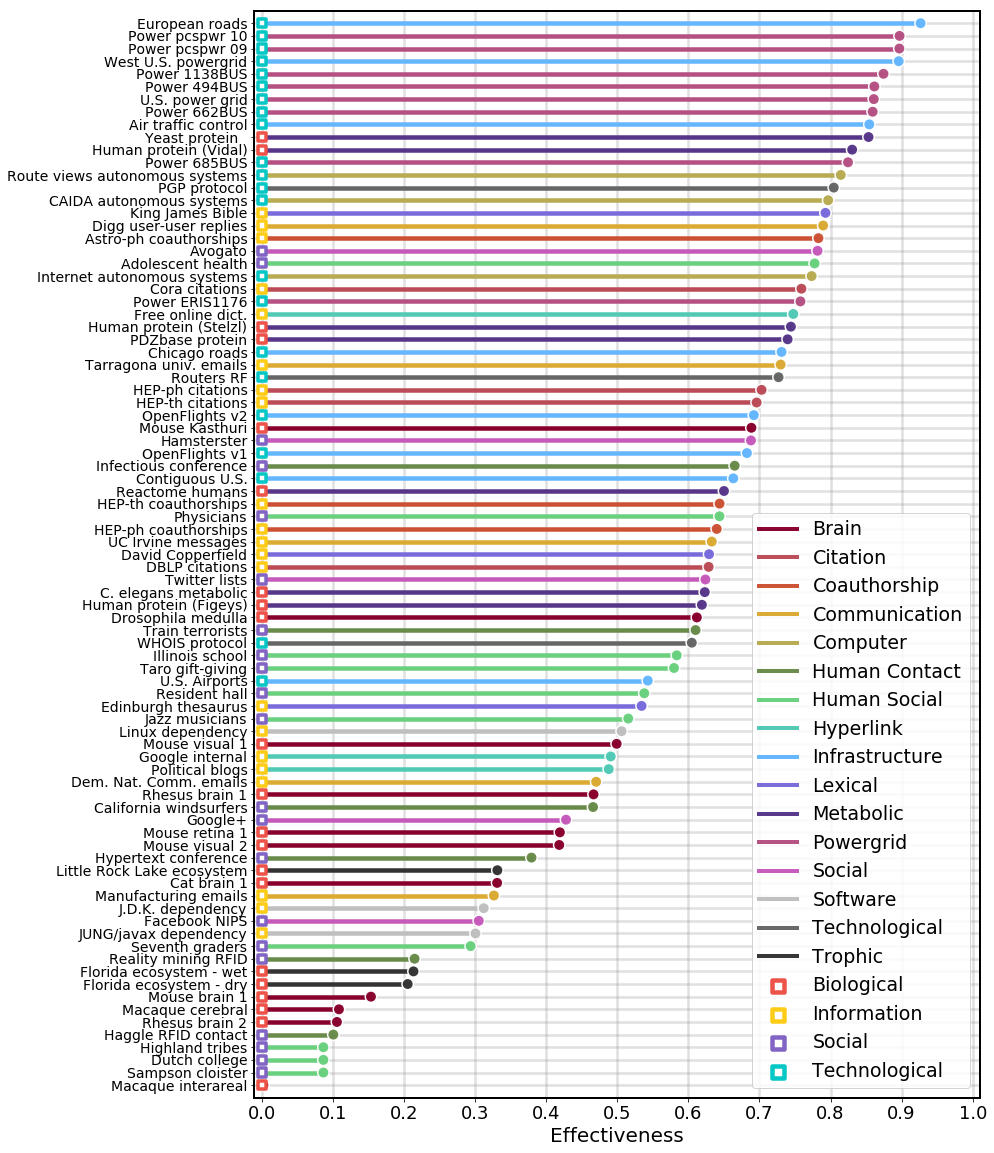

In [27]:
plt.figure(figsize=(13,20))

for idx,i in enumerate(ordering):
    co = out_dict['color'][i]
    ef = out_dict['Eff'][i]
    plt.hlines(idx,0,ef,color=co,linewidth=4.5)
    

plt.scatter(eff_vals, list(range(len(eff_vals))), edgecolors='w',linewidths=1.5,
            marker='o', s=130, alpha=0.98, facecolor=np.array(out_dict['color'])[ordering], zorder=20)
plt.scatter([0]*len(eff_vals), list(range(len(eff_vals))), 
            marker='s', s=65, alpha=0.98,edgecolors=np.array(out_dict['newco'])[ordering], 
            linewidths=3.5, facecolor='w', zorder=20)

for ii, lab in enumerate(['Biological','Information','Social','Technological']):
    plt.scatter([-1], [-1], 
            marker='s', s=125, alpha=0.98,edgecolors=newcos[ii], 
            linewidths=4.5, facecolor='w', label=lab)#+"\n (n=%i)"%len(all_data[ii]))

for ii, lab in enumerate(sorted(np.unique(out_dict['Category']))):
    plt.plot([-10,-9], [-10,-9], marker='', alpha=0.98, linewidth=4.0,
             color=cols[ii], label=lab)

plt.legend(loc=4, fontsize=19, framealpha=0.85)
plt.yticks(list(range(len(eff_vals))), np.array(out_dict['Name'])[ordering], fontsize=14)
plt.xticks(np.linspace(0,1,11), ["%.1f"%i for i in np.linspace(0,1,11)], size=18)
plt.grid(alpha=0.3, color='#999999', linestyle='-', linewidth=2.5)
plt.xlabel('Effectiveness', size=20)
plt.xlim(-0.01,1.01)
plt.ylim(-1,len(eff_vals))

# plt.savefig("../figs/pngs/Konect_SortedEffectiveness_withLabels.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveness_withLabels.pdf", bbox_inches='tight')
plt.show()

In [28]:
rn_bio = np.array([out_dict['Eff'][i] for i in range(len(out_dict['Eff'])) \
                   if out_dict['Category_EI'][i]=='Biological'])
rn_inf = np.array([out_dict['Eff'][i] for i in range(len(out_dict['Eff'])) \
                   if out_dict['Category_EI'][i]=='Information'])
rn_soc = np.array([out_dict['Eff'][i] for i in range(len(out_dict['Eff'])) \
                   if out_dict['Category_EI'][i]=='Social'])
rn_tec = np.array([out_dict['Eff'][i] for i in range(len(out_dict['Eff'])) \
                   if out_dict['Category_EI'][i]=='Technological'])

labs = {'biological':0,'social':2,"information":1,'technological':3}
a = labs['biological']
b = labs['social']

all_data = [rn_bio,rn_inf,rn_soc,rn_tec]

for lab1 in labs.keys():
    a = labs[lab1]
    for lab2 in labs.keys():
        b = labs[lab2]
        if a!=b:
            t,p = sp.stats.ttest_ind(all_data[a], all_data[b], equal_var=False)
            print("comparing",lab1,"       \t", "to \t ",lab2,"       \t t-statistic = %.7f, \t p < %.8f"%(t,p))

comparing biological        	 to 	  social        	 t-statistic = -0.2671864, 	 p < 0.79068383
comparing biological        	 to 	  information        	 t-statistic = -2.1375021, 	 p < 0.03998787
comparing biological        	 to 	  technological        	 t-statistic = -5.4691506, 	 p < 0.00000983
comparing social        	 to 	  biological        	 t-statistic = 0.2671864, 	 p < 0.79068383
comparing social        	 to 	  information        	 t-statistic = -2.1407029, 	 p < 0.03850486
comparing social        	 to 	  technological        	 t-statistic = -6.2301375, 	 p < 0.00000035
comparing information        	 to 	  biological        	 t-statistic = 2.1375021, 	 p < 0.03998787
comparing information        	 to 	  social        	 t-statistic = 2.1407029, 	 p < 0.03850486
comparing information        	 to 	  technological        	 t-statistic = -4.1850520, 	 p < 0.00031720
comparing technological        	 to 	  biological        	 t-statistic = 5.4691506, 	 p < 0.00000983
comparing technol

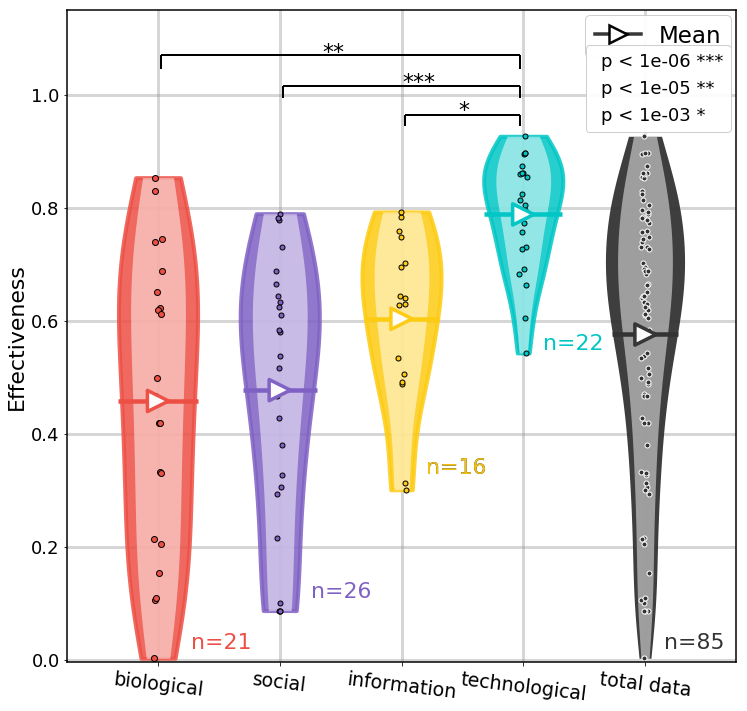

In [31]:
plt.rc('axes', linewidth=1.5)
mult = 0.8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15*mult, 15*mult))

plt.plot([1]*len(all_data[0])+np.random.uniform(-0.035,0.035,len(all_data[0])),all_data[0],
         marker='o',linestyle='', markeredgecolor='k',
         markersize=6,color=newcos[0])
plt.plot([3]*len(all_data[1])+np.random.uniform(-0.035,0.035,len(all_data[1])),all_data[1],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[1])
plt.plot([2]*len(all_data[2])+np.random.uniform(-0.035,0.035,len(all_data[2])),all_data[2],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[2])
plt.plot([4]*len(all_data[3])+np.random.uniform(-0.035,0.035,len(all_data[3])),all_data[3],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[3])        
plt.plot([5]*len(out_dict['Eff'])+np.random.uniform(-0.035,0.035,len(out_dict['Eff'])),out_dict['Eff'],
         marker='o',linestyle='',markeredgecolor='w',
         markersize=5,color="#333333")
    
    
parts = ax.violinplot(all_data, positions=[1,3,2,4], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.65)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor(newcos[i])
    pc.set_facecolor(newcos[i])
    pc.set_alpha(0.85)
    pc.set_linewidth(4.0)
parts = ax.violinplot(all_data, positions=[1,3,2,4], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.45)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor(newcos[i])
    pc.set_facecolor('w')
    pc.set_alpha(0.5)
    pc.set_linewidth(0.0)

parts = ax.violinplot(out_dict['Eff'], positions=[5], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.65)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor("#333333")
    pc.set_facecolor('#333333')
    pc.set_alpha(0.95)
    pc.set_linewidth(0.0)
parts = ax.violinplot(out_dict['Eff'], positions=[5], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.45)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor("#333333")
    pc.set_facecolor('w')
    pc.set_alpha(0.5)
    pc.set_linewidth(0.0)

plt.hlines([np.mean(data) for data in all_data], [0.67, 2.6925, 1.695, 3.68], [1.33, 3.3075, 2.305, 4.32], 
           linestyles='-', colors=newcos, zorder=1, linewidth=4.5)#, colors=newcos)
plt.hlines([np.mean(out_dict['Eff'])], [4.73], [5.27], 
           linestyles='-', colors='#333333', zorder=1, linewidth=4.5)#, colors=newcos)

plt.plot(np.linspace(-10,-20,5), np.linspace(-10,-20,5), linestyle='-', marker='>', markersize=18, 
         markerfacecolor='w', color='#333333', linewidth=3.5, markeredgecolor='k', 
         markeredgewidth=2.5, label='Mean', alpha=0.98)

plt.scatter([1,3,2,4], [np.mean(data) for data in all_data], zorder=20,
           marker='>', s=450, facecolor='w', edgecolors=newcos, linewidths=3.5, alpha=0.98)
plt.scatter([5], [np.mean(out_dict['Eff'])], zorder=20, 
           marker='>', s=450, facecolor='w', edgecolors="#333333", linewidths=3.5, alpha=0.98)

ax.set_ylabel('Effectiveness', fontsize=22)
ax.set_xticks([y+1 for y in range(len(all_data)+1)])
ax.set_xticklabels(['biological', 'social', 'information', 'technological', 'total data'],
                   fontsize=19, rotation=353)
ax.set_yticks(np.linspace(0,1,6))
ax.set_yticklabels(["%.1f"%i for i in np.linspace(0,1,6)], fontsize=18)
ax.grid(True, linestyle='-', linewidth=3.0, color='#999999', alpha=0.4)

ax.text(1.27,0.02,"n=%i"%len(all_data[0]), fontsize=22, color=newcos[0])
ax.text(3.20,0.33,"n=%i"%len(all_data[1]), fontsize=22, color='k')
ax.text(3.20,0.33,"n=%i"%len(all_data[1]), fontsize=22, color=newcos[1],alpha=0.95)
ax.text(2.26,0.11,"n=%i"%len(all_data[2]), fontsize=22, color=newcos[2])
ax.text(4.16,0.55,"n=%i"%len(all_data[3]), fontsize=22, color=newcos[3])
ax.text(5.16,0.02,"n=%i"%len(out_dict['Eff']), fontsize=22, color="#333333")

ax.text(2.35,1.065,"**", fontsize=22)
ax.hlines(1.07, labs['biological']+1+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['biological']+1+0.025, 1.045, 1.07, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 1.045, 1.07, linewidth=2.0)

ax.text(3.01,1.012,"***", fontsize=22)
ax.hlines(1.015, labs['social']+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['social']+0.025, 0.995, 1.015, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 0.995, 1.015, linewidth=2.0)

ax.text(3.47,0.962,"*", fontsize=22)
ax.hlines(0.965, labs['information']+2+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['information']+2+0.025, 0.945, 0.965, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 0.945, 0.965, linewidth=2.0)


x1 = ax.plot([], [], marker='.', linestyle='', c='w')
x2 = ax.plot([], [], marker='.', linestyle='', c='w')
x3 = ax.plot([], [], marker='.', linestyle='', c='w')
legs=[x1,x2,x3]
leg1 = ax.legend(bbox_to_anchor=(1.009,1.01), fontsize=23, ncol=1, columnspacing=2, framealpha=0.95)
ax.legend([l[0] for l in legs], ["p < 1e-06 ***","p < 1e-05 **","p < 1e-03 *"], handletextpad=-1.525,
          bbox_to_anchor=(1.0055,0.96), fontsize=18, ncol=1, columnspacing=-3.75, framealpha=0.95)
ax.add_artist(leg1)
ax.set_ylim(-0.005, 1.15)
ax.set_xlim(0.25, 5.75)

plt.savefig("../figs/pngs/Konect_Effectiveness_Violinplots_all.png", dpi=425, bbox_inches='tight')
plt.savefig("../figs/pdfs/Konect_Effectiveness_Violinplots_all.pdf", bbox_inches='tight')
plt.show()

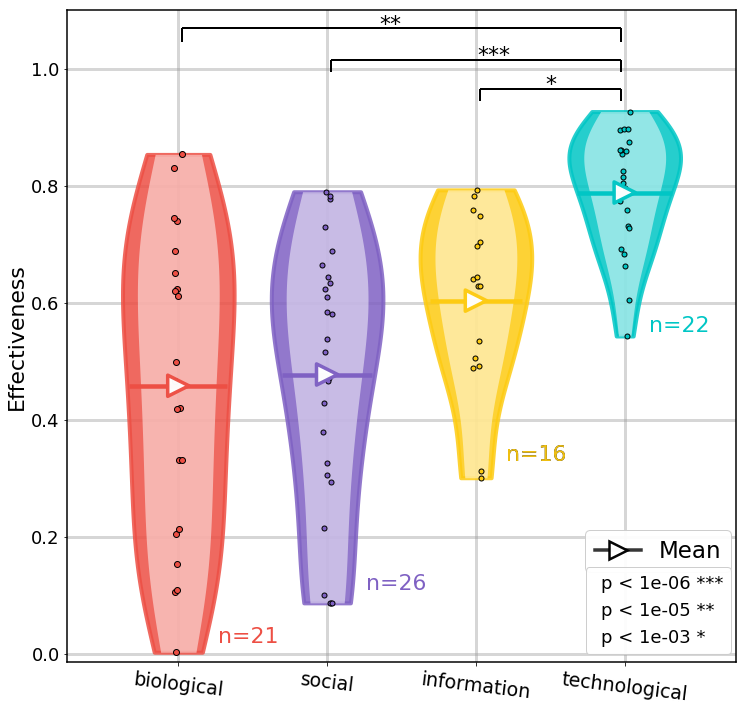

In [32]:
plt.rc('axes', linewidth=1.5)
mult = 0.8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15*mult, 15*mult))

plt.plot([1]*len(all_data[0])+np.random.uniform(-0.035,0.035,len(all_data[0])),all_data[0],
         marker='o',linestyle='', markeredgecolor='k',
         markersize=6,color=newcos[0])
plt.plot([3]*len(all_data[1])+np.random.uniform(-0.035,0.035,len(all_data[1])),all_data[1],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[1])
plt.plot([2]*len(all_data[2])+np.random.uniform(-0.035,0.035,len(all_data[2])),all_data[2],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[2])
plt.plot([4]*len(all_data[3])+np.random.uniform(-0.035,0.035,len(all_data[3])),all_data[3],
         marker='o',linestyle='',markeredgecolor='k',
         markersize=5,color=newcos[3])            
    
parts = ax.violinplot(all_data, positions=[1,3,2,4], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.75)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor(newcos[i])
    pc.set_facecolor(newcos[i])
    pc.set_alpha(0.85)
    pc.set_linewidth(4.0)
parts = ax.violinplot(all_data, positions=[1,3,2,4], showmeans=False, showmedians=False, 
                      showextrema=False, widths=0.55)
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_edgecolor(newcos[i])
    pc.set_facecolor('w')
    pc.set_alpha(0.5)
    pc.set_linewidth(0.0)

plt.hlines([np.mean(data) for data in all_data], [0.67, 2.6925, 1.695, 3.68], [1.33, 3.3075, 2.305, 4.32], 
           linestyles='-', colors=newcos, zorder=1, linewidth=4.5)

plt.plot(np.linspace(-10,-20,5), np.linspace(-10,-20,5), linestyle='-', marker='>', markersize=18, 
         markerfacecolor='w', color='#333333', linewidth=3.5, markeredgecolor='k', 
         markeredgewidth=2.5, label='Mean', alpha=0.98)

plt.scatter([1,3,2,4], [np.mean(data) for data in all_data], zorder=20,
           marker='>', s=450, facecolor='w', edgecolors=newcos, linewidths=3.5, alpha=0.98)

ax.set_ylabel('Effectiveness', fontsize=22)
ax.set_xticks([y+1 for y in range(len(all_data))])
ax.set_xticklabels(['biological', 'social', 'information', 'technological'],
                   fontsize=19, rotation=353)
ax.set_yticks(np.linspace(0,1,6))
ax.set_yticklabels(["%.1f"%i for i in np.linspace(0,1,6)], fontsize=18)
ax.grid(True, linestyle='-', linewidth=3.0, color='#999999', alpha=0.4)

ax.text(1.27,0.02,"n=%i"%len(all_data[0]), fontsize=22, color=newcos[0])
ax.text(3.20,0.33,"n=%i"%len(all_data[1]), fontsize=22, color='k')
ax.text(3.20,0.33,"n=%i"%len(all_data[1]), fontsize=22, color=newcos[1],alpha=0.95)
ax.text(2.26,0.11,"n=%i"%len(all_data[2]), fontsize=22, color=newcos[2])
ax.text(4.16,0.55,"n=%i"%len(all_data[3]), fontsize=22, color=newcos[3])

ax.text(2.35,1.065,"**", fontsize=22)
ax.hlines(1.07, labs['biological']+1+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['biological']+1+0.025, 1.045, 1.07, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 1.045, 1.07, linewidth=2.0)

ax.text(3.01,1.012,"***", fontsize=22)
ax.hlines(1.015, labs['social']+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['social']+0.025, 0.995, 1.015, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 0.995, 1.015, linewidth=2.0)

ax.text(3.47,0.962,"*", fontsize=22)
ax.hlines(0.965, labs['information']+2+0.025, labs['technological']+1-0.025, linewidth=2.0)
ax.vlines(labs['information']+2+0.025, 0.945, 0.965, linewidth=2.0)
ax.vlines(labs['technological']+1-0.025, 0.945, 0.965, linewidth=2.0)

x1 = ax.plot([], [], marker='.', linestyle='', c='w')
x2 = ax.plot([], [], marker='.', linestyle='', c='w')
x3 = ax.plot([], [], marker='.', linestyle='', c='w')

legs=[x1,x2,x3]
leg1 = ax.legend(bbox_to_anchor=(1.009,0.22), fontsize=23, ncol=1, columnspacing=2, framealpha=0.95)
ax.legend([l[0] for l in legs], ["p < 1e-06 ***","p < 1e-05 **","p < 1e-03 *"], handletextpad=-1.525,
          bbox_to_anchor=(1.0055,0.16), fontsize=18, ncol=1, columnspacing=-3.75, framealpha=0.95)
ax.add_artist(leg1)
ax.set_ylim(-0.015, 1.1)
ax.set_xlim(0.25, 4.75)

plt.savefig("../figs/pngs/Konect_Effectiveness_Violinplots.png", dpi=425, bbox_inches='tight')
plt.savefig("../figs/pdfs/Konect_Effectiveness_Violinplots.pdf", bbox_inches='tight')
plt.show()

_____________